In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import json
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from shutil import copyfile

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
vectors = np.load('/run/media/backman/yay/ui_layout_vectors/ui_vectors.npy')

In [3]:
names = json.load(open('/run/media/backman/yay/ui_layout_vectors/ui_names.json'))
names = names['ui_names']
names = np.asarray(names)

In [5]:
vectors.shape

(72103, 64)

In [5]:
tf.reset_default_graph()

In [6]:
embeddings = tf.get_variable('embedding', initializer = tf.constant(vectors))

In [7]:
test = tf.get_variable('test', initializer = tf.constant(vectors[:500]))


In [43]:
session = tf.Session()

session.run(tf.global_variables_initializer())

emb_normalized = tf.nn.l2_normalize(embeddings,1)        
test = tf.nn.l2_normalize(test,1)        
cond = tf.constant(0.9)
print(emb_normalized)
# av_mean = lambda row: tf.reduce_sum(
#     tf.cast(
#         tf.greater(
#             tf.reduce_sum(
#                 tf.multiply(
#                     emb_normalized, row)),cond),tf.float32))

av_mean = lambda row: tf.reduce_sum(tf.matmul(emb_normalized, tf.expand_dims(row,1)))

means = tf.map_fn(av_mean, test)
max = tf.argmax(means)
min = tf.argmin(means)
# best_sum = tf.nn.top_k(tf.reduce_sum(cosine_sim, 1), 10)

# best_mean = tf.nn.top_k(tf.reduce_mean(cosine_sim, 1), 10)
# total_average = tf.reduce_mean(cosine_sim)
# res = session.run([best_sum, best_mean, total_average])

means, maximal_mean, minimal_mean = session.run([means, max, min])

Tensor("l2_normalize_51:0", shape=(72103, 64), dtype=float32)


In [42]:
names[maximal_mean], names[minimal_mean], maximal_mean, minimal_mean, means

('41233.png',
 '15417.png',
 6,
 368,
 array([ 56524.55078125,  51468.125     ,  48861.7109375 ,  50526.6328125 ,
         58632.0390625 ,  22470.625     ,  61811.22265625,  52779.4375    ,
         23603.25390625,  57174.51953125,  34302.3359375 ,  13153.6015625 ,
         47898.48046875,  39606.41796875,  57895.109375  ,  53106.23046875,
         51664.77734375,  33613.734375  ,  31579.85351562,  48006.90234375,
         47555.625     ,  55582.0703125 ,  32639.07421875,  54099.71484375,
         20313.79296875,  35602.3515625 ,  35022.0546875 ,  48732.2265625 ,
         44588.4140625 ,  56112.36328125,  36369.49609375,  49287.7421875 ,
         43919.6171875 ,  61656.203125  ,  45746.21875   ,  20441.5       ,
         46320.78125   ,  45034.58984375,  56701.796875  ,  38874.89453125,
         30278.85546875,  52155.67578125,  54662.7734375 ,  57596.5625    ,
         51097.7265625 ,  55302.171875  ,  14626.984375  ,  50025.2890625 ,
         61656.203125  ,  35098.12109375,  39986.0

In [26]:
close_to_me = tf.placeholder(tf.float32, [1, vectors.shape[1]])

norm_emb = tf.nn.l2_normalize(embeddings, dim=1)
norm_ele = tf.nn.l2_normalize(close_to_me, dim=1)

cosine_sim = tf.matmul(norm_ele, tf.transpose(norm_emb, [1,0]))

closest_ui = tf.argmax(cosine_sim, 1)

top_uis = tf.nn.top_k(cosine_sim, k=10)
res = session.run(top_uis, feed_dict = {close_to_me: vectors[23341:23342,:]})
print(res.indices)

[[23341 19445  5932 32964 66896 32891 19607 42472 26799 65047]]


In [36]:
close_to_me = tf.placeholder(tf.float32, [1, vectors.shape[1]])

norm_emb = tf.nn.l2_normalize(embeddings, dim=1)
norm_ele = tf.nn.l2_normalize(close_to_me, dim=1)

cosine_sim = tf.matmul(norm_ele, tf.transpose(norm_emb, [1,0]))


res = session.run(cosine_sim, feed_dict = {close_to_me: vectors[23341:23342,:]})
print(res.shape)

Tensor("l2_normalize_43:0", shape=(72103, 64), dtype=float32)
(1, 72103)


In [ ]:
a = tf.constant([[1,2,3],[4,5,6]])
x = lambda r: tf.reduce_sum(tf.cast(tf.less(tf.reduce_sum(tf.multiply(r,a)),tf.constant(50)),tf.int32))
print(session.run(tf.map_fn(x, a)))

In [36]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)


In [37]:
tsne_results = tsne.fit_transform(vectors)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 72103 samples in 0.453s...
[t-SNE] Computed neighbors for 72103 samples in 896.960s...
[t-SNE] Computed conditional probabilities for sample 1000 / 72103
[t-SNE] Computed conditional probabilities for sample 2000 / 72103
[t-SNE] Computed conditional probabilities for sample 3000 / 72103
[t-SNE] Computed conditional probabilities for sample 4000 / 72103
[t-SNE] Computed conditional probabilities for sample 5000 / 72103
[t-SNE] Computed conditional probabilities for sample 6000 / 72103
[t-SNE] Computed conditional probabilities for sample 7000 / 72103
[t-SNE] Computed conditional probabilities for sample 8000 / 72103
[t-SNE] Computed conditional probabilities for sample 9000 / 72103
[t-SNE] Computed conditional probabilities for sample 10000 / 72103
[t-SNE] Computed conditional probabilities for sample 11000 / 72103
[t-SNE] Computed conditional probabilities for sample 12000 / 72103
[t-SNE] Computed conditional probabilities for 

In [38]:
print(tsne_results.shape)

(72103, 2)


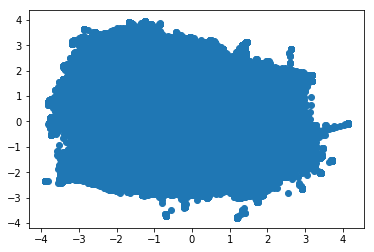

In [39]:
plt.scatter(tsne_results[:,0], tsne_results[:,1])

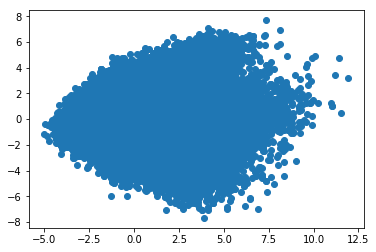

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
vectors_std = StandardScaler().fit_transform(vectors)
Y_sklearn = sklearn_pca.fit_transform(vectors_std)
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1])

In [4]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(vectors, quantile=0.055)#0.6
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(vectors)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(Y_sklearn[my_members, 0], Y_sklearn[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

number of estimated clusters : 2


NameError: name 'Y_sklearn' is not defined

In [12]:
print(len(labels_unique))

2


In [13]:
from PIL import Image
src_dir = '/run/media/backman/yay/unique_uis/combined/'
dst_dir = '/run/media/backman/yay/unique_uis/special2/'
for key, label in enumerate(ms.labels_):
    if label == 1:#3
        file = names[key].replace('png','jpg')
        im = Image.open(src_dir + file)
        width, height = im.size
        top = height * 0.0323
        bottom = height * 0.9339
        crop = im.crop((0,top,width,bottom))
        crop = crop.resize((36,64))
        crop.save(dst_dir+file,"JPEG")
    